In [2]:
import numpy as np

from qiskit import BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, execute
from qiskit.tools.jupyter import *

from qiskit.visualization import plot_histogram

In [9]:
def dj_oracle(case, n):
    # we need n inputs + 1 output
    oracle_qc = QuantumCircuit(n+1)
    
    # first case is balanced
    if case == "balanced":
        # we apply controlled-NOT gates for each qubit
        # using the output qubit as the target
        for q in range(n):
            oracle_qc.cx(q,n)
        
    # second case is constant
    if case == "constant":
        # decide if the output of the oracle be
        # either 0 or 1
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # anchor for circuit draw
    return oracle_gate
    

In [10]:
def dj_algorithm(n, case = 'random'):
    # n inputs, 1 output, n classical bits
    dj_circuit = QuantumCircuit(n+1, n)
    
    # set up the input register
    for q in range(n):
        dj_circuit.h(q)
    
    # set up the output qubit
    dj_circuit.x(n)
    dj_circuit.h(n)
    
    # add the Oracle gate
    if case == "random":
        random = np.random.randint(2)
        if random == 0:
            case = "constant"
        else:
            case = "random"
    
    oracle = dj_oracle(case, n)
    dj_circuit.append(oracle, range(n+1))
    
    # super position all states and measure
    for q in range(n):
        dj_circuit.h(q)
        dj_circuit.measure(q,q)
    
    return dj_circuit

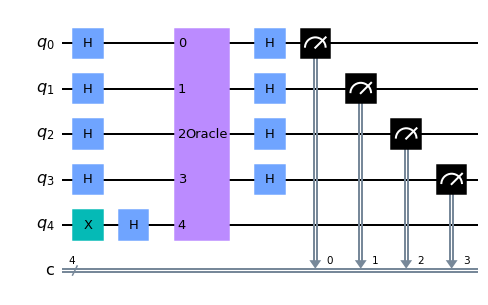

In [11]:
n          = 4
dj_circuit = dj_algorithm(n)
dj_circuit.draw('mpl')

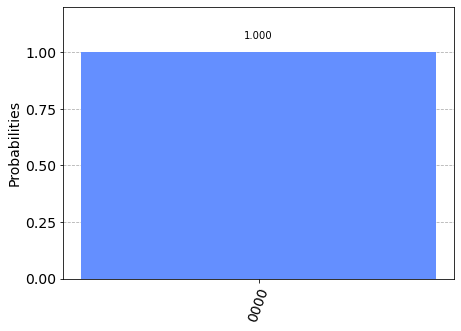

In [14]:
backend    = BasicAer.get_backend("qasm_simulator")
shots      = 1024
dj_circuit = dj_algorithm(n)
results    = execute(dj_circuit, backend=backend, 
                     shots=shots).result()
answer     = results.get_counts()
plot_histogram(answer)

#### Use IBM-Q

In [ ]:
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
                                      not x.configuration().simulator and x.status().operational==True))
print(f"least busy backend: {backend}")
%qiskit_job_watcher
dj_circuit = dj_algorithm(n)
job = execute(dj_circuit, backend=backend, shots=shots, optimization_level=3)

In [ ]:
results = job.result()
answer  = results.get_counts()
plot_histogram(answer)